# Random Sample Imputation
Aim: Select a random sample and fill all the null values with them

When: when data is missing complety at random

## Importing

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

## Imputation for age

In [9]:
df['Age'].isnull().sum()

177

In [31]:
# Goal: Replace all the null values with a random value
# df['Age']= Column name to fill
# dropna()= To get sample only from non-null values
# sample =Used to get random sample values
# (df['Age'].isnull().sum()= to pass the number of random values to be generated. in this casse=177
# random_state
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

In [39]:
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df.loc

##  Function

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # equate the random sample index and the age index 
    random_sample.index=df[df[variable].isnull()].index
    # where ever the variable isnull replace the age_random with random sample
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [46]:
df.loc[df['Age'].isnull(),'Age_random']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age_random, Length: 177, dtype: float64

In [45]:
df.loc[df['Age'].isnull()]

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,NaN
17,1,NaN,13.0000,28.0,NaN
19,1,NaN,7.2250,28.0,NaN
26,0,NaN,7.2250,28.0,NaN
28,1,NaN,7.8792,28.0,NaN
...,...,...,...,...,...
859,0,NaN,7.2292,28.0,NaN
863,0,NaN,69.5500,28.0,NaN
868,0,NaN,9.5000,28.0,NaN
878,0,NaN,7.8958,28.0,NaN


In [47]:
impute_nan(df,'Age',28)

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age_random, Length: 177, dtype: float64

In [51]:
df.tail(20)

,Survived,Age,Fare,Age_median,Age_random
871,1,47.0,52.5542,47.0,47.0
872,0,33.0,5.0000,33.0,33.0
873,0,47.0,9.0000,47.0,47.0
874,1,28.0,24.0000,28.0,28.0
875,1,15.0,7.2250,15.0,15.0
876,0,20.0,9.8458,20.0,20.0
877,0,19.0,7.8958,19.0,19.0
878,0,NaN,7.8958,28.0,34.0
879,1,56.0,83.1583,56.0,56.0
880,1,25.0,26.0000,25.0,25.0


In [21]:
df.Age_random.isnull().sum()

0

## Checking for change or Distortion

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

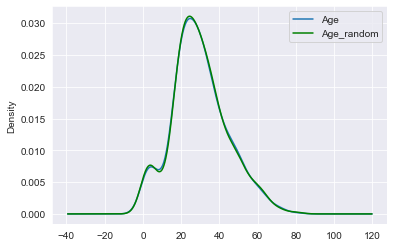

In [49]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantage of random sample imputation
1. Change or distortion is less
2. Easy to implement

### Disadvantage  of random sample imputation
1. Randomness may not work everytime